In [44]:
#import libraries and functions to load the data
from matplotlib import pyplot as plt

import os
import time

import numpy as np
import torch
import torch.nn.functional as F

In [55]:
#for nvidia 
has_gpu = torch.cuda.is_available()
#for mac
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "cuda" if torch.cuda.is_available() else "cpu"

print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

## Some Hyperparameters 
random_seed = 1
batch_size = 32
learning_rate = 0.001
num_epochs = 10
num_classes = 10

GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


/var/folders/18/jb6sg5tn0wd0md220_4vpttw0000gn/T/ipykernel_8289/2853860843.py:4: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  has_mps = getattr(torch,'has_mps',False)
/var/folders/18/jb6sg5tn0wd0md220_4vpttw0000gn/T/ipykernel_8289/2853860843.py:5: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = "mps" if getattr(torch,'has_mps',False) \


In [46]:
from torchvision import transforms, datasets
from torch.utils.data.dataset import random_split
from torchvision.datasets import ImageFolder

train_data_transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((32, 32)),  
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)
test_data_transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((32, 32)),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [47]:
import torchvision.transforms as transforms
from torch.utils.data.dataset import random_split
from torchvision.datasets import FashionMNIST
import torchvision
import torch
from torch.utils.data import DataLoader, Dataset, random_split


dataset = torchvision.datasets.ImageFolder(root='kanji_dataset', transform=train_data_transform)

train_size = int(0.8 * len(dataset))  
test_size = len(dataset) - train_size  
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_size = int(0.9 * len(train_dataset))  
valid_size = len(train_dataset) - train_size  

train_dataset, valid_dataset = random_split(train_dataset, [train_size, valid_size])
valid_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Mini_batch Dimensions: [B, C, H, W] = 
torch.Size([32, 1, 32, 32])


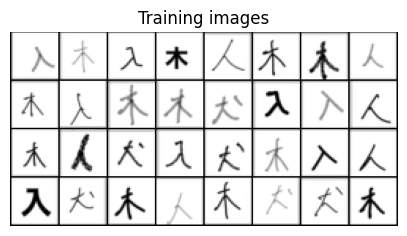

Labels = 
[[0 3 0 3]
 [1 3 3 1]
 [3 0 3 3]
 [2 0 0 1]
 [3 1 2 0]
 [2 3 0 1]
 [0 2 3 1]
 [3 2 2 3]]


In [48]:
import torchvision.utils as vutils

%matplotlib inline
import matplotlib.pyplot as plt

im_batch = next(iter(train_loader))
print('Mini_batch Dimensions: [B, C, H, W] = ')
print(im_batch[0].shape)
plt.figure(figsize=(5, 5))
plt.title("Training images")
plt.axis("off")
plt.imshow(
    np.transpose(
        vutils.make_grid(im_batch[0][:64], nrow=8, padding=1, normalize=True), (1, 2, 0)
    )
)
plt.show()
print("Labels = " )
print(im_batch[1][:64].data.numpy().reshape(8,-1))


In [49]:
import ssl
import certifi
import urllib.request

# SSL 証明書のパスを設定
ssl_context = ssl.create_default_context(cafile=certifi.where())

# URL を読み込む
with urllib.request.urlopen("https://example.com", context=ssl_context) as response:
    html = response.read()
    print(html)


b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [50]:
import torch
import torchvision.models as models

vgg16 = models.vgg16(pretrained=False)

print(vgg16)

final_layer = vgg16.classifier[6]

num_classes = 4
vgg16.classifier[6] = torch.nn.Linear(final_layer.in_features, num_classes)

print(vgg16.classifier)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [51]:
def accuracy(model, data_loader, device):
    with torch.no_grad():
        model = model.train()
        true_pred = 0
        tot_samples = 0
        for imgs, labels in data_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            logits = model(imgs)
            _, label_pred = torch.max(logits, axis=1)
            true_pred += (label_pred==labels).sum()
            tot_samples += labels.shape[0]
        acc = (true_pred/float(tot_samples))*100
    return acc

Epoch [1/10], Train Loss: 12320820476.2109, Valid Loss: 2650.8822, Train Accuracy: 27.14%, Valid Accuracy: 16.50%, Time: 0.52 min, Learning Rate 0.01000000 -> 0.00500000
Epoch [2/10], Train Loss: 149.6769, Valid Loss: 9.3974, Train Accuracy: 26.41%, Valid Accuracy: 29.13%, Time: 1.01 min, Learning Rate 0.00500000 -> 0.00250000
Epoch [3/10], Train Loss: 4.2127, Valid Loss: 1.4326, Train Accuracy: 23.47%, Valid Accuracy: 16.50%, Time: 1.46 min, Learning Rate 0.00250000 -> 0.00125000
Epoch [4/10], Train Loss: 1.4636, Valid Loss: 1.4236, Train Accuracy: 28.61%, Valid Accuracy: 26.21%, Time: 1.91 min, Learning Rate 0.00125000 -> 0.00062500
Epoch [5/10], Train Loss: 1.4098, Valid Loss: 1.4038, Train Accuracy: 29.10%, Valid Accuracy: 26.21%, Time: 2.41 min, Learning Rate 0.00062500 -> 0.00031250
Epoch [6/10], Train Loss: 1.3897, Valid Loss: 1.3975, Train Accuracy: 26.89%, Valid Accuracy: 16.50%, Time: 2.91 min, Learning Rate 0.00031250 -> 0.00015625
Epoch [7/10], Train Loss: 1.4044, Valid Los

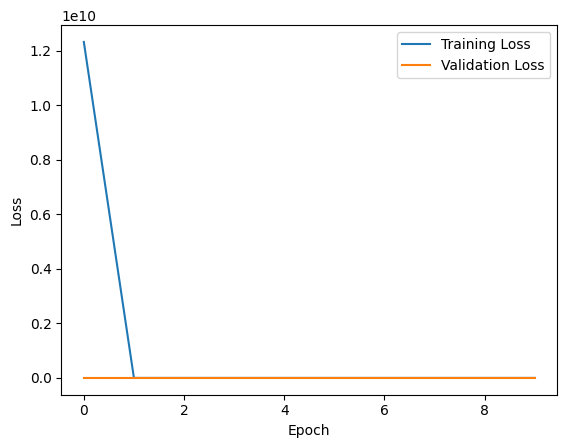

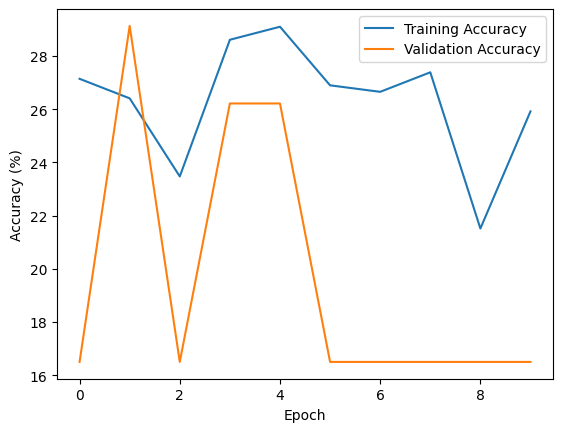

In [56]:
import torch
import torchvision.models as models
import torch.nn.functional as F
import numpy as np
import time
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg16 = models.vgg16(pretrained=False)

weights = vgg16.features[0].weight.data

new_weights = weights[:, 0, :, :].unsqueeze(1)

vgg16.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
vgg16.features[0].weight.data = new_weights

final_layer = vgg16.classifier[6]
num_classes = 4
vgg16.classifier[6] = torch.nn.Linear(final_layer.in_features, num_classes)

vgg16 = vgg16.to(device)

optimizer = torch.optim.Adam(vgg16.parameters(), lr=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

def train(model, optimizer, scheduler, train_loader, valid_loader, device, num_epochs=10):
    start = time.time()
    train_costs = []
    valid_costs = []
    train_accuracies = []  
    valid_accuracies = []  
    for epoch in range(num_epochs):
        model.train()
        sum_loss = 0.0
        correct_train = 0
        total_train = 0
        for batch_idx, (imgs, labels) in enumerate(train_loader):
            imgs = imgs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            logits = model(imgs)
            loss = F.cross_entropy(logits, labels)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()
            
            _, predicted_train = torch.max(logits, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()
        
        train_costs.append(sum_loss / len(train_loader))
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        prev_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        current_lr = optimizer.param_groups[0]["lr"]

        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0
        with torch.no_grad():
            for imgs, labels in valid_loader:
                imgs = imgs.to(device)
                labels = labels.to(device)
                logits = model(imgs)
                valid_loss += F.cross_entropy(logits, labels, reduction='sum').item()
                
                # テストデータセットでの正確さを計算
                _, predicted_valid = torch.max(logits, 1)
                total_valid += labels.size(0)
                correct_valid += (predicted_valid == labels).sum().item()
        valid_costs.append(valid_loss / len(valid_loader.dataset))
        valid_accuracy = 100 * correct_valid / total_valid
        valid_accuracies.append(valid_accuracy)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_costs[-1]:.4f}, "
              f"Valid Loss: {valid_costs[-1]:.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, "
              f"Valid Accuracy: {valid_accuracy:.2f}%, "
              f"Time: {(time.time() - start) / 60:.2f} min, "
              f"Learning Rate {prev_lr:.8f} -> {current_lr:.8f}")

    print(f"Total Training Time: {(time.time() - start) / 60:.2f} min")

    plt.plot(range(len(train_costs)), train_costs, label='Training Loss')
    plt.plot(range(len(valid_costs)), valid_costs, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
    plt.plot(range(len(valid_accuracies)), valid_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

train(vgg16, optimizer, scheduler, train_loader, valid_loader, device, num_epochs=10)
